# 0) Loading the data

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path

sns.set()

housing_path = Path("..", "data", "housing.csv")
df = pd.read_csv(housing_path)

# 1) Preparing the data

Features: 
- 'latitude',
- 'longitude',
- 'housing_median_age',
- 'total_rooms',
- 'total_bedrooms',
- 'population',
- 'households',
- 'median_income',
- 'median_house_value',
- 'ocean_proximity',

Steps:
- Select only the features from above and fill in the missing values with 0.
- Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
- Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
- Create a new column population_per_household by dividing the column population by the column households from dataframe.


In [7]:
feature_columns = ["latitude", "longitude", "housing_median_age", "total_rooms", "total_bedrooms",
                   "population", "households", "median_income", "median_house_value", "ocean_proximity"]

df = df[feature_columns]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Check the missing values

In [9]:
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Filling missing values in `total_bedrooms` to `0`

In [10]:
df = df.fillna(0)

Create a feature that represents the number of rooms per household

In [11]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853


Create a feature that represents the number of bedrooms per number of rooms

In [12]:
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096


Create a feature that represents the population per household

In [13]:
df["population_per_household"] = df["population"] / df["households"]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


# 2) Questions

## 2.1) Question 1

What is the most frequent observation (mode) for the column ocean_proximity?

Options:

- [ ] NEAR BAY
- [X] <1H OCEAN
- [ ] INLAND
- [ ] NEAR OCEAN

In [14]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

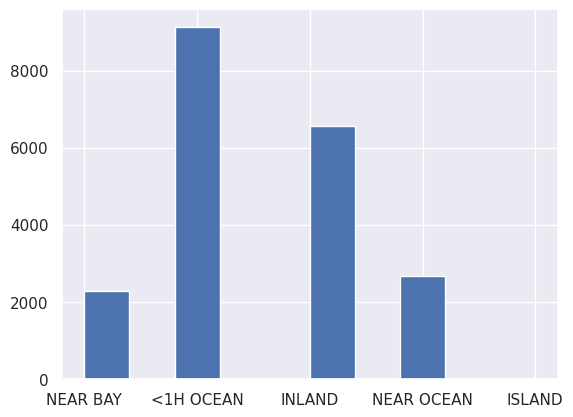

In [26]:
df["ocean_proximity"].hist()
plt.show()

## 2.2) Question 2
What are the two features that have the biggest correlation in this dataset?

Options:

- [X] total_bedrooms and households
- [ ] total_bedrooms and total_rooms
- [ ] population and households
- [ ] population_per_household and total_rooms

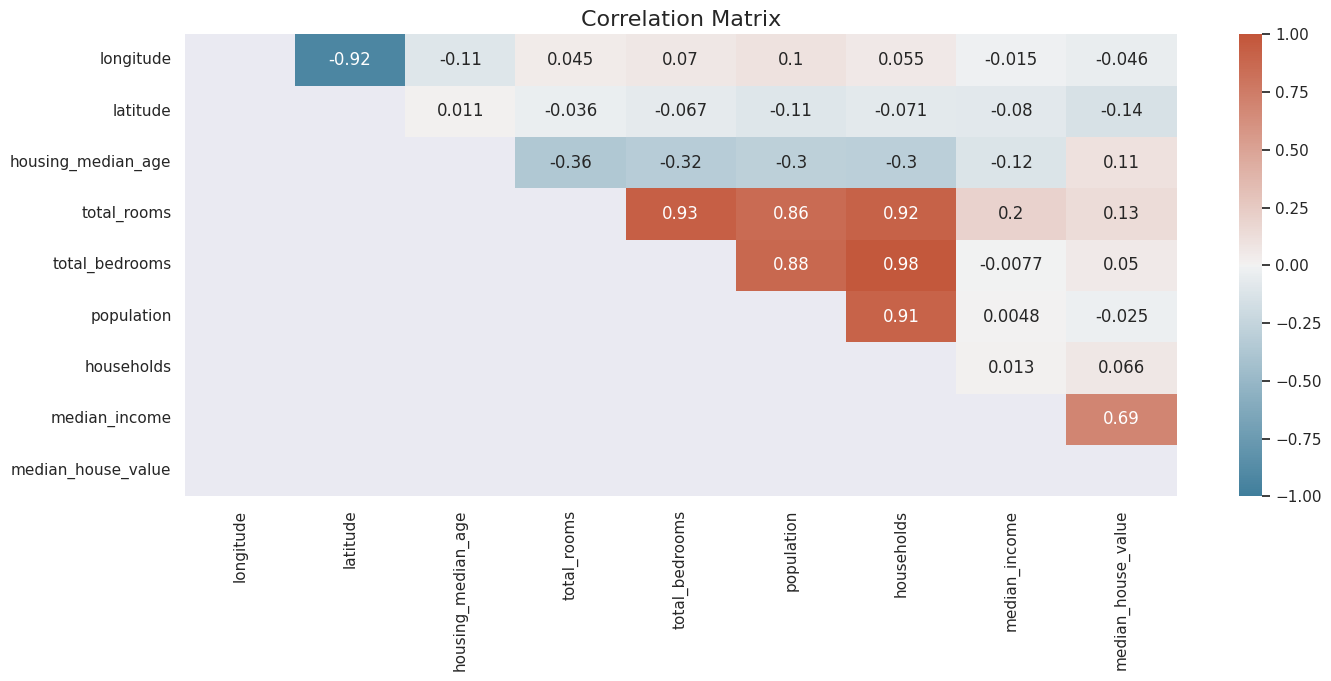

In [42]:
plt.figure(figsize=(16, 6))
corr = df.corr(numeric_only=True)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(np.ones_like(corr, dtype=bool)).T
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1,)
plt.title("Correlation Matrix", size=16)
plt.show()

In order to make `median_house_value` binary, we consider values that are above or below the median, by creating a new column: `above_average`.

In [46]:
median_house_value_avg = df["median_house_value"].mean()
df["above_average"] = (df["median_house_value"] > median_house_value_avg).astype(int)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,above_average
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1


Splitting the train/validation/test dataset, chossing a 60/20/20 split

In [47]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_valid = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [ ]:
y_train, y_valid, y_test = map(lambda x: x["above_average"].values, [df_train, df_valid, df_test])
df_train, df_valid, df_test = map(lambda x: x.drop(["above_average", "median_house_value"], axis=1), [df_train, df_valid, df_test])

## 2.3) Question 3

What is the value of mutual information? Round it to 2 decimal digits using round(score, 2)
Options:

- [ ] 0.26
- [ ] 0
- [X] 0.10
- [ ] 0.16

In [61]:
from sklearn.metrics import mutual_info_score

mutual = mutual_info_score(y_train, df_train["ocean_proximity"])
print(f"Mutual information for categorical variable: {round(mutual, 2)}")

Mutual information for categorical variable: 0.1


## 2.4) Question 4

- Now let's train a logistic regression
- Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
- Fit the model on the training dataset.
- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
- model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:

- [ ] 0.60
- [ ] 0.72
- [X] 0.84
- [ ] 0.95


In [67]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()
train_dicts = df_train.to_dict(orient="records")
valid_dicts = df_valid.to_dict(orient="records")
X_train = dv.fit_transform(train_dicts)
X_valid = dv.transform(valid_dicts)

In [69]:
from sklearn.linear_model import LogisticRegression

model_params = dict(solver="liblinear", C=1.0, max_iter=1_000, random_state=42)
model = LogisticRegression(**model_params)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [74]:
from sklearn.metrics import classification_report, accuracy_score
pred_valid = model.predict(X_valid)
print(classification_report(y_valid, pred_valid))
print(f"accuracy: {round(accuracy_score(y_valid, pred_valid), 2)}")

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2443
           1       0.80      0.80      0.80      1685

    accuracy                           0.84      4128
   macro avg       0.83      0.83      0.83      4128
weighted avg       0.84      0.84      0.84      4128

accuracy: 0.84


## 2.5) Question 5

- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?
    - [ ] total_rooms
    - [ ] total_bedrooms
    - [ ] population
    - [X] households


In [85]:
drop_columns = ["full", "total_rooms", "total_bedrooms", "population", "households"]

model_params = dict(solver="liblinear", C=1.0,
                    max_iter=1_000, random_state=42)

results = {}

for col in drop_columns:
    dv = DictVectorizer()
    features = ["total_rooms", "total_bedrooms", "population", "households"]
    if col != "full":
        features.remove(col)
    train_dicts = df_train[features].to_dict(orient="records")
    valid_dicts = df_valid[features].to_dict(orient="records")
    X_train = dv.fit_transform(train_dicts)
    X_valid = dv.transform(valid_dicts)
    model = LogisticRegression(**model_params)

    model.fit(X_train, y_train)
    pred_valid = model.predict(X_valid)
    results[col] = round(accuracy_score(y_valid, pred_valid), 2)

results

{'full': 0.71,
 'total_rooms': 0.63,
 'total_bedrooms': 0.66,
 'population': 0.66,
 'households': 0.67}

## 2.6) Question 6

- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
- If there are multiple options, select the smallest alpha.

Options:

- [X] 0
- [ ] 0.01
- [ ] 0.1
- [ ] 1
- [ ] 10

In [89]:
df["log_median_house_value"] = np.log1p(df["median_house_value"])
df_reg = df.drop(["above_average", "median_house_value"], axis=1)
df_reg.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,log_median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,13.022766
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,12.789687
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,12.771673
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,12.740520
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,12.743154


In [92]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df_reg, test_size=0.2, random_state=42)
df_train, df_valid = train_test_split(df_full_train, test_size=0.25, random_state=42)

y_train, y_valid, y_test = map(lambda x: x["log_median_house_value"].values, [df_train, df_valid, df_test])
df_train, df_valid, df_test = map(lambda x: x.drop("log_median_house_value", axis=1), [df_train, df_valid, df_test])

In [94]:
dv = DictVectorizer()
train_dicts = df_train.to_dict(orient="records")
valid_dicts = df_valid.to_dict(orient="records")
X_train = dv.fit_transform(train_dicts)
X_valid = dv.transform(valid_dicts)

In [97]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alpha_range = [0, 0.01, 0.1, 1, 10]
results = {}
for alpha in alpha_range:
    model = Ridge(alpha=alpha, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    predict_valid = model.predict(X_valid)
    rmse_valid = mean_squared_error(predict_valid, y_valid, squared=False)
    results[alpha] = round(rmse_valid, 3)

results

/home/nahum/Documents/ml-zoomcamp/.venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:830: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/home/nahum/Documents/ml-zoomcamp/.venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:830: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/home/nahum/Documents/ml-zoomcamp/.venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:830: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs ar

{0: 0.525, 0.01: 0.525, 0.1: 0.525, 1: 0.525, 10: 0.525}